Loading Dataset

In [14]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [15]:
data = datasets.load_iris()
X, y = data.data, data.target

PCA

In [16]:
class PCA:
    def __init__(self, n_components = None):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self,X):
        # mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # cov
        cov = np.cov(X.T)
        
        # eigen
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        # sort
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # components
        self.components = eigenvectors[:self.n_components]
        
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

Testing

In [17]:
pca = PCA(2)
pca.fit(X)
projected = pca.transform(X)

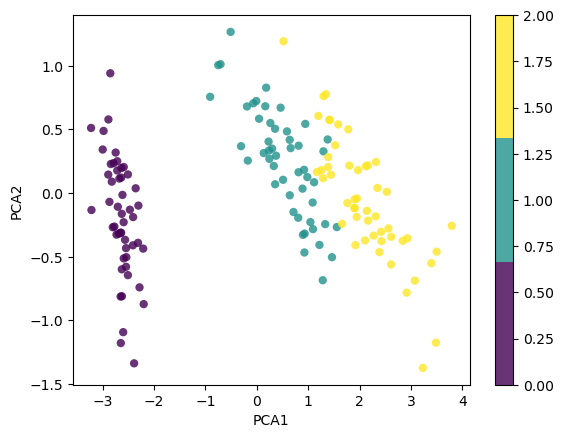

In [18]:
x1 = projected[:,0]
x2 = projected[:,1]

plt.scatter(x1, x2, c=y, edgecolors='none', alpha=.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.show()